# Problem Statement: We are going to predict the position of the Football player based on individual characteristics

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/players_fifa23.csv")

In [3]:
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   FullName           18539 non-null  object 
 3   Age                18539 non-null  int64  
 4   Height             18539 non-null  int64  
 5   Weight             18539 non-null  int64  
 6   PhotoUrl           18539 non-null  object 
 7   Nationality        18539 non-null  object 
 8   Overall            18539 non-null  int64  
 9   Potential          18539 non-null  int64  
 10  Growth             18539 non-null  int64  
 11  TotalStats         18539 non-null  int64  
 12  BaseStats          18539 non-null  int64  
 13  Positions          18539 non-null  object 
 14  BestPosition       18539 non-null  object 
 15  Club               18539 non-null  object 
 16  ValueEUR           185

In [5]:
data.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

Lets make our lfe easier and lets say we have consulted a coach or subject expert and he/she has give us a set of most relevent paramaters/coolumns

In [6]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [7]:
df = data[needed_columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   Age                18539 non-null  int64  
 3   Height             18539 non-null  int64  
 4   Weight             18539 non-null  int64  
 5   Overall            18539 non-null  int64  
 6   Potential          18539 non-null  int64  
 7   Growth             18539 non-null  int64  
 8   TotalStats         18539 non-null  int64  
 9   BaseStats          18539 non-null  int64  
 10  BestPosition       18539 non-null  object 
 11  Club               18539 non-null  object 
 12  ValueEUR           18539 non-null  int64  
 13  WageEUR            18539 non-null  int64  
 14  ReleaseClause      18539 non-null  int64  
 15  ContractUntil      18447 non-null  float64
 16  ClubJoined         185

#### Q1. Can we visulaize the age distribution of players andd then also calculate and plot the mean age w.r.t data given

Firstly lets look at the age distribution

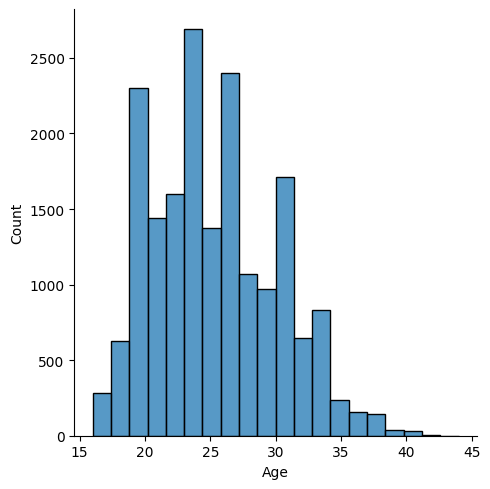

In [13]:
sns.displot(x=df['Age'], bins=20)

Now lets caluculate the mean age of players and plot it on our displot

In [17]:
np.mean(df['Age'])

25.24041210421274

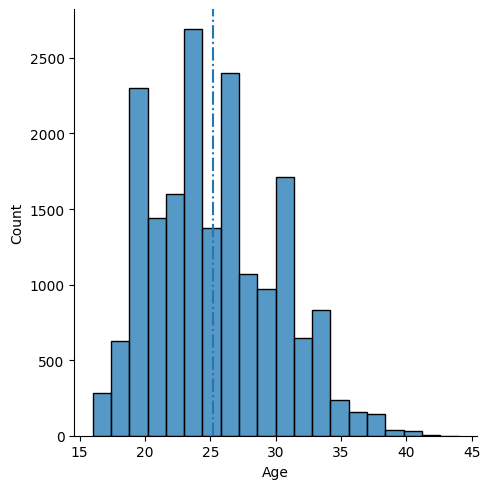

In [16]:
sns.displot(x=df['Age'], bins=20)
plt.axvline(np.mean(df['Age']), ls='dashdot')

#### Q2. Does age of player afftect his ball control performance?

Can we visualize and make some inferences?

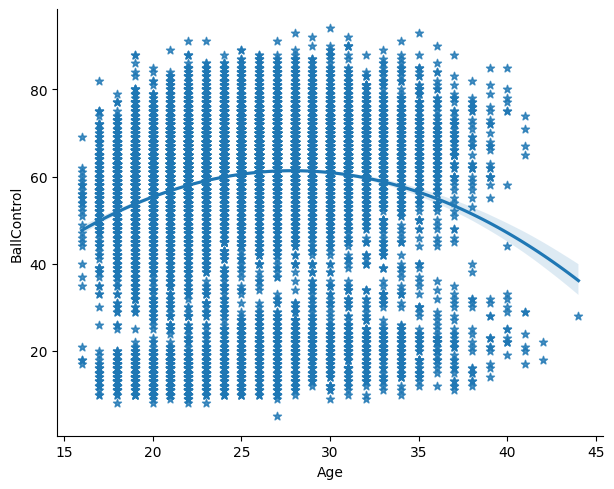

In [28]:
# lmplot gves a linear fit line and is used for bivariate analysis to plot best fit line withput having to train Linear reg model
sns.lmplot(x= 'Age', y= 'BallControl', data=df, aspect = 1.25, order=2, markers= '*')

Q3. Show how height affects different paramaters like stamin, pace and heading acccuracy, dribbling, passing?

<Axes: xlabel='Height', ylabel='Stamina'>

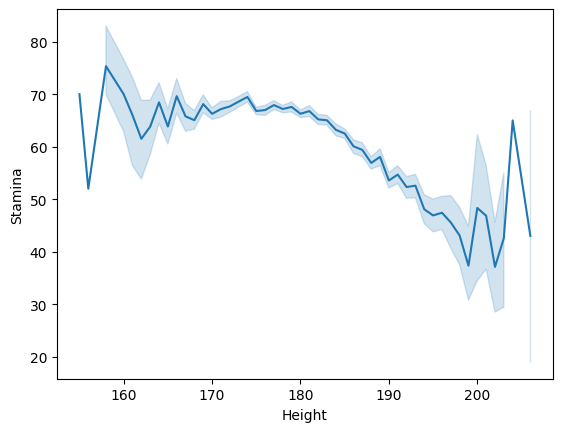

In [29]:
sns.lineplot(x='Height', y='Stamina', data=df)

<Axes: xlabel='Height', ylabel='PaceTotal'>

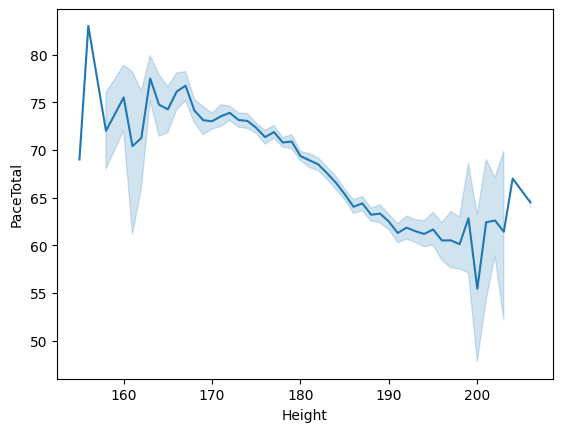

In [30]:
sns.lineplot(x='Height', y='PaceTotal', data=df)

I want all comparisons in one figure

<Axes: xlabel='HEIGHT (in cm)', ylabel='VALUES (from 0 to 100)'>

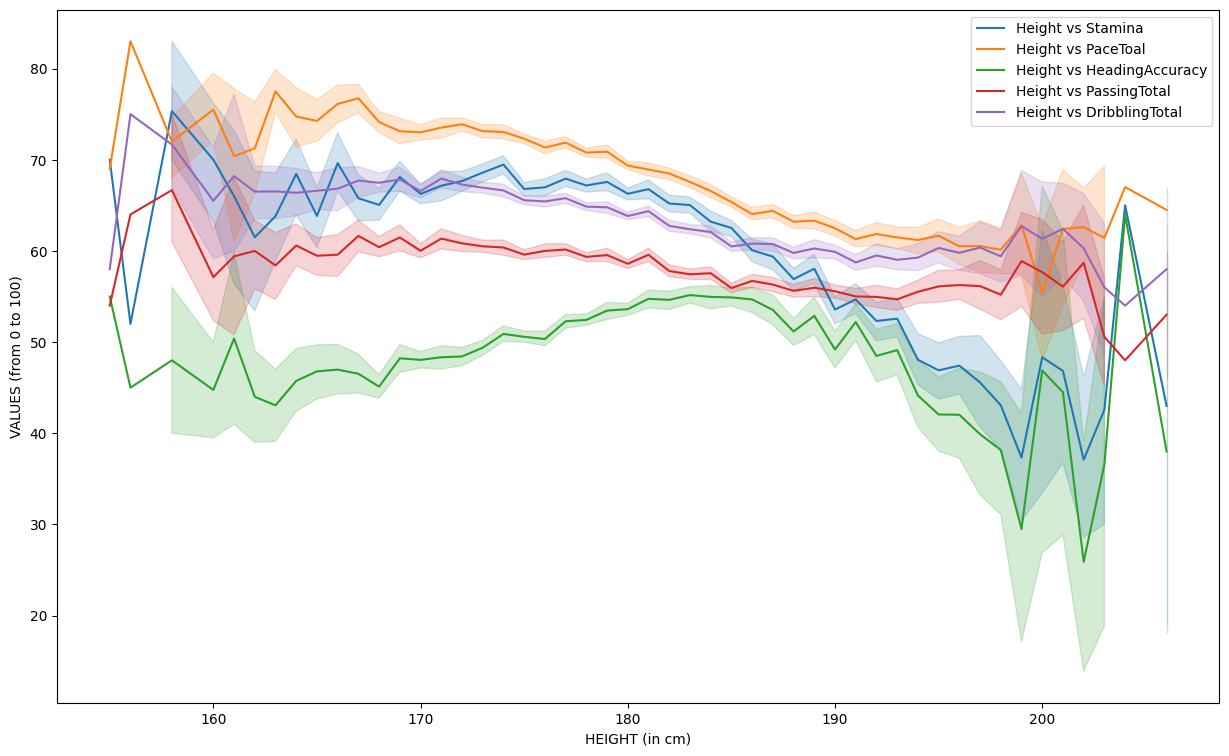

In [40]:
fig = plt.gcf()
fig.set_size_inches(15,9)
plt.ylabel('VALUES (from 0 to 100)')
plt.xlabel('HEIGHT (in cm)')
sns.lineplot(x='Height', y='Stamina', data=df, legend = 'auto', label= 'Height vs Stamina')
sns.lineplot(x='Height', y='PaceTotal', data=df, legend = 'auto', label= 'Height vs PaceToal')
sns.lineplot(x='Height', y='HeadingAccuracy', data=df, legend = 'auto', label= 'Height vs HeadingAccuracy')
sns.lineplot(x='Height', y='PassingTotal', data=df, legend = 'auto', label= 'Height vs PassingTotal')
sns.lineplot(x='Height', y='DribblingTotal', data=df, legend = 'auto', label= 'Height vs DribblingTotal')


Q4. Show and find out if there is relation between Wages and Overall rating of players

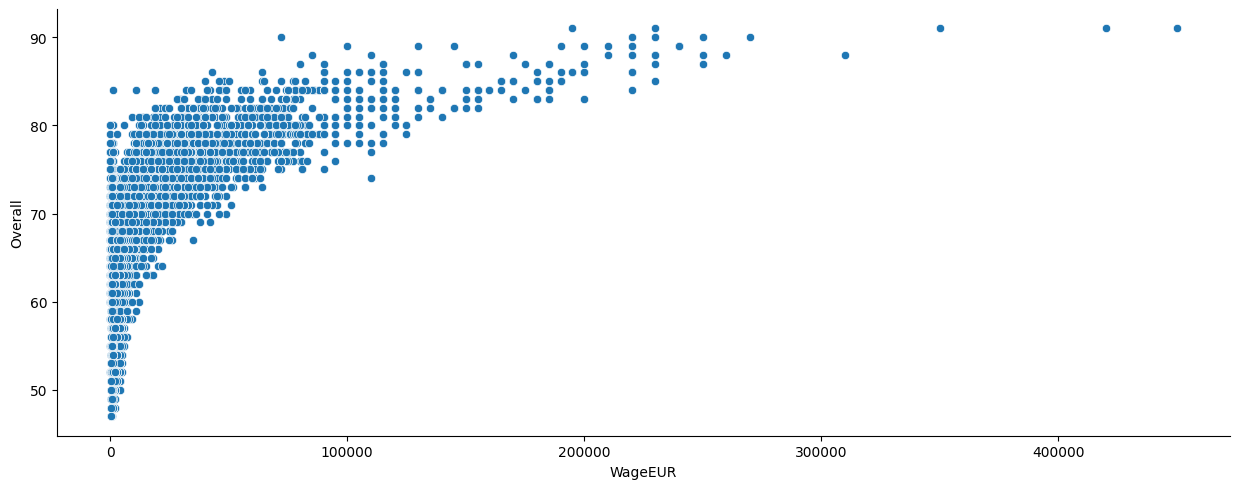

In [42]:
sns.relplot(x='WageEUR', y='Overall', data=df, aspect=2.5)

Q.5 Visualize the top fastest players

In [46]:
top_acc = df.sort_values(by = ['Acceleration'], ascending=False)

In [47]:
top_acc

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6
402,253149,J. Frimpong,21,171,64,80,86,6,2027,446,...,39,71,73,77,74,12,7,8,13,14
892,232104,D. James,24,171,76,77,82,5,1954,425,...,64,67,54,45,34,7,6,11,15,9
651,213956,Adama Traoré,26,178,86,79,80,1,1929,436,...,47,73,37,38,35,13,9,11,12,7
141,234396,A. Davies,21,185,77,84,89,5,2170,475,...,60,78,76,77,71,11,11,6,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14922,269521,Hou Yu,31,192,80,60,60,0,841,313,...,10,26,9,13,12,64,59,49,58,63
18249,269542,Li Yijia,21,189,77,51,56,5,828,272,...,15,21,15,15,13,51,53,52,51,50
18431,258888,D. Robson,20,181,73,50,63,13,817,264,...,14,32,6,13,12,54,50,50,48,47
16336,259668,A. Pierre,21,190,83,58,72,14,890,313,...,19,39,7,11,12,59,56,62,58,59


<ipython-input-53-581bdb465bdb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y= 'Acceleration', data=top_acc.head(30), palette='rocket')


<Axes: xlabel='Name', ylabel='Acceleration'>

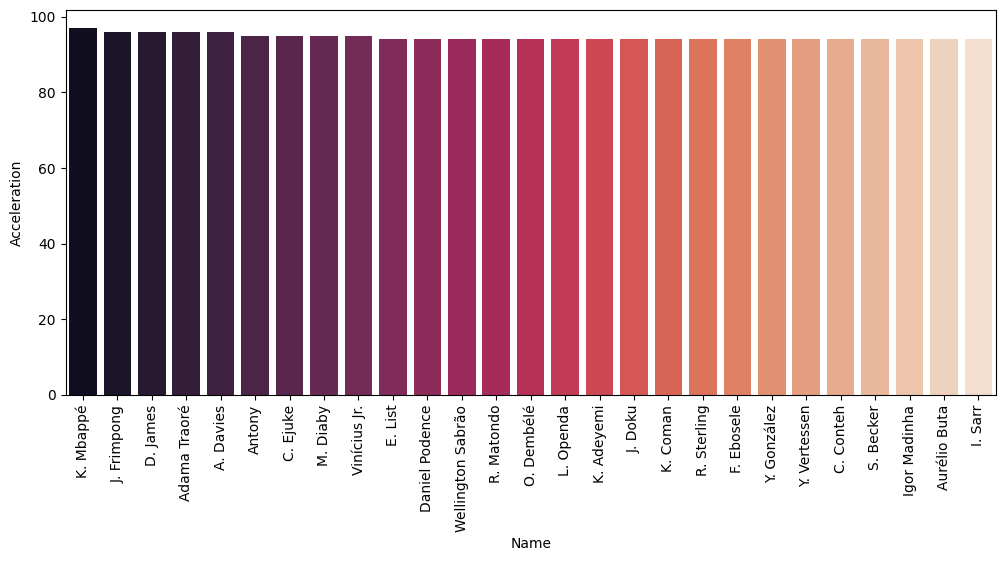

In [53]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(x='Name', y= 'Acceleration', data=top_acc.head(30), palette='rocket')

#### Q6. Is there any relation between the position of player and his wage and Value  

Helps understand budget split and planning

<Axes: xlabel='BestPosition', ylabel='WageEUR'>

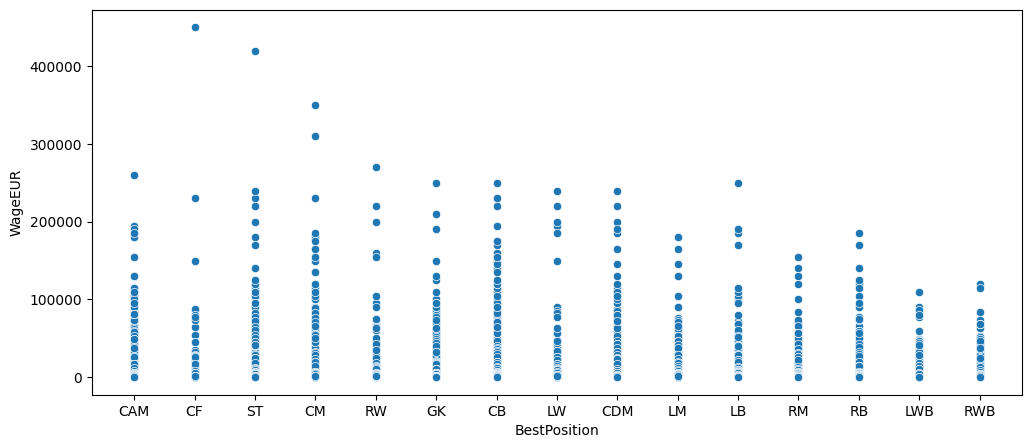

In [57]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BestPosition', y='WageEUR', data = df)

<Axes: xlabel='BestPosition', ylabel='ValueEUR'>

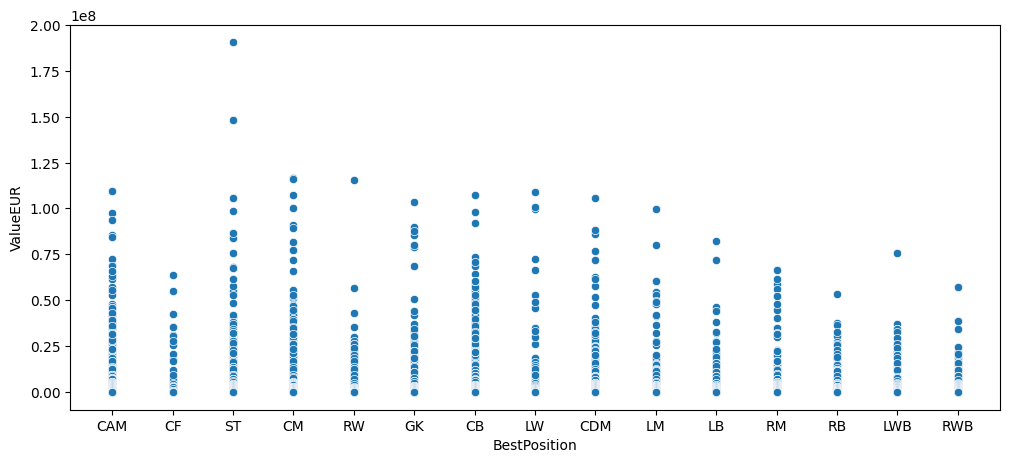

In [58]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BestPosition', y='ValueEUR', data = df)

#### Q7. Nationalty vs Wages -> Visualize the Nations by Number of Highest wages recived

Try to find out which countries has how many players in top 100 hiest paid players list

1. Step1 -> Sort the wages in desceding order
2. Step2 -> Plot the wage vs Nationality graph


In [59]:
# Step 1
top_wages = df.sort_values(by='WageEUR', ascending = False)

In [60]:
top_wages.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
28,182521,T. Kroos,32,183,76,88,88,0,2147,444,...,73,88,71,73,60,10,11,13,7,10
5,209331,M. Salah,30,175,71,90,90,0,2226,471,...,86,92,38,43,41,14,14,9,11,14


<ipython-input-63-22db5b1e59ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y= 'Nationality', data = top_wages.head(100), palette="husl")


<Axes: title={'center': 'Nationality wise player count with Highest wages'}, xlabel='count', ylabel='Nationality'>

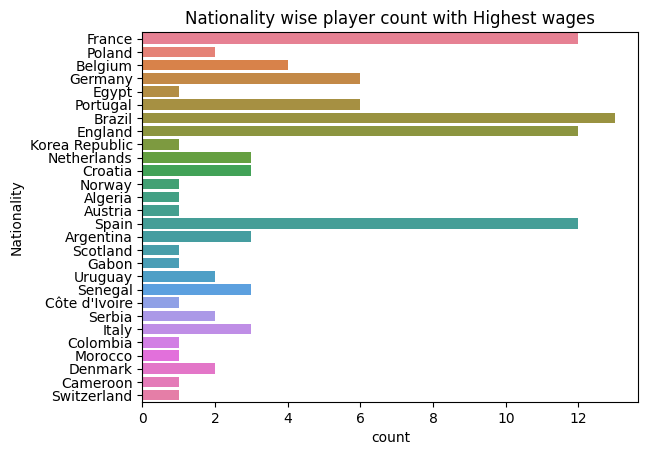

In [63]:
#Step 2
plt.title('Nationality wise player count with Highest wages')
sns.countplot(y= 'Nationality', data = top_wages.head(100), palette="husl")

#### Q8. Visualize the AGE vs Potential of a player

<Axes: xlabel='Age', ylabel='Potential'>

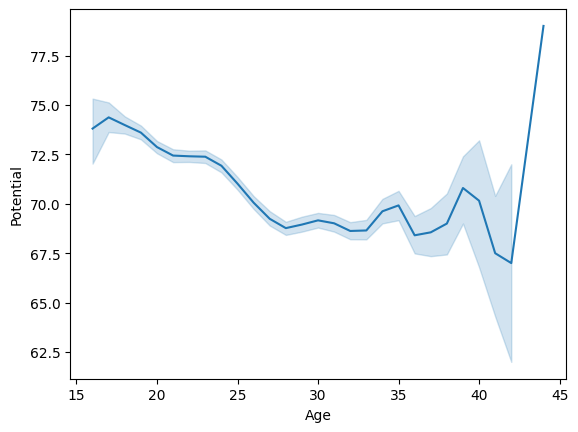

In [64]:
sns.lineplot(x='Age', y='Potential', data=df)

#### Q9. Visualize top 50 players and their clubs

1. Step 1: Sort the top players by their overall filter only top 50.
2. step 2: Plot the how many players from each club

In [65]:
#Step 1
top_rated = df.sort_values(by = 'Overall', ascending= False)

<ipython-input-68-b4734e0fe408>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Name', y='Overall', data=top_rated.head(50), palette="husl")


<Axes: xlabel='Name', ylabel='Overall'>

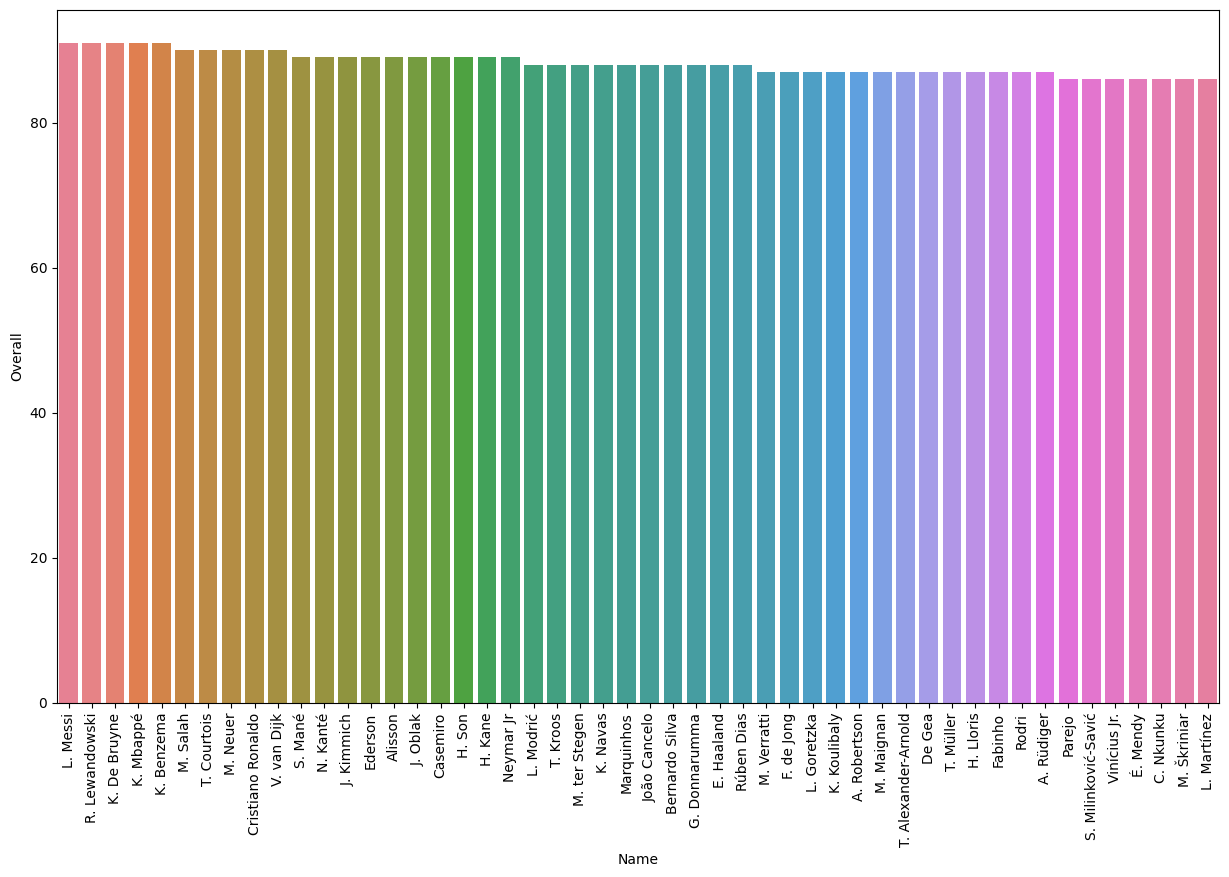

In [68]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=90)
sns.barplot(x= 'Name', y='Overall', data=top_rated.head(50), palette="husl")

<Axes: xlabel='Club', ylabel='count'>

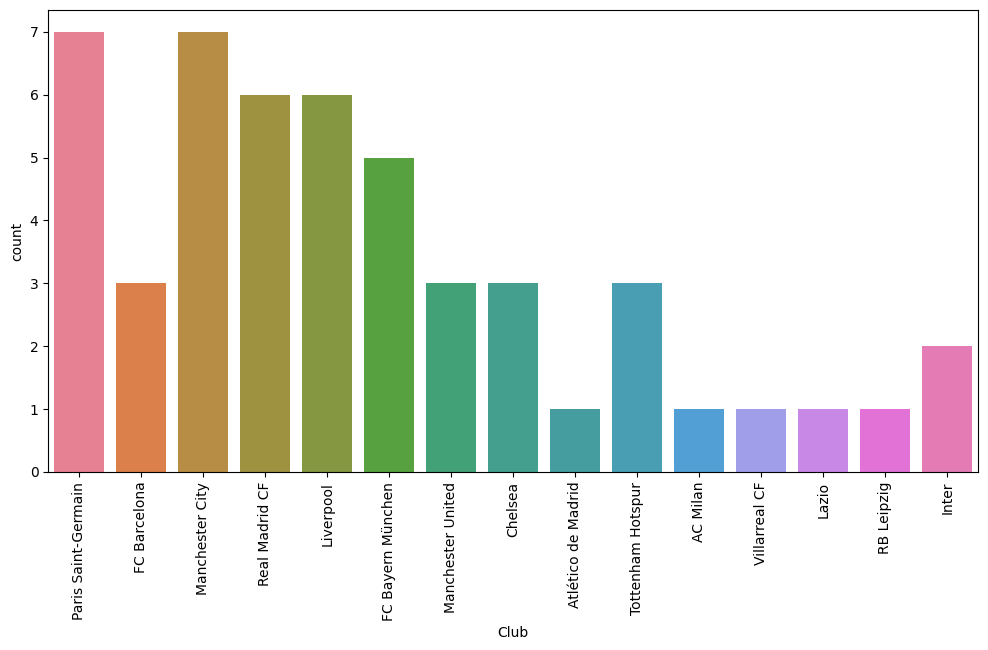

In [74]:
#step 2
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(x= 'Club', data=top_rated.head(50), hue='Club')